<a href="https://colab.research.google.com/github/jahnavi-2116/AI-ML-projects/blob/main/MBA_Analysis_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Necessary Libraries
! pip install pandas
! pip install numpy
! pip install numpy
! pip install gradio
! pip install mlxtend

Note: The Apriori Algorithm is an unsupervised ML algorithm used for association rule learning, which is an data mining technique mostly used for identifying frequent patterns, connections and dependencies among different groups of items called itemsets in data. So we use mlxtend (machine learning extensions) library is frequently used for this apriori algorithm.

In [2]:
# Loading the data
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

groceries = pd.read_csv("/content/groc.csv")
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Now that the data is loaded, i'm trying to prepare a transactional data, where each list in the data is a transaction and each string associated to it is an item bought in that particular transaction. So this helps me setting up the machine to know how to scan all the items in the groceries list and would recognize the unique item bought in that data list and creates a binary array, identifying if the particular item is in the groceries list (true) or not (false).

Once I tried to convert all the data into one-hot encoded format, I'm trying to see what are the most frequently bought items in the transactions. This is known as Market Basket Analysis using the Apriori Algorithm. This actually helps build the association rules based on the frequent items. So I'm seeing what are the items that appear in ≥ 20% of transactions.

In [12]:
# Print columns and shape
print(groceries.columns)
print(groceries.shape)

Index(['support', 'itemsets'], dtype='object')
(0, 2)


Since, the data is not grouped, the apriori algorithm would probably show that the frequent items are empty. So in the below step im trying to group the items by transactions in the given dataset.

In [15]:
# Grouping items by transactions (member_number + date)
# CHeck if the dataframe is empty before grouping
if not groceries.empty:
  groceries = groceries.groupby(['Member_number', 'Date'])['itemDescription'].apply(lambda x: ','.join(x)).reset_index()
  groceries.head()
else:
  print("Groceries dataframe is empty, skipping off grouping operation.")

Groceries dataframe is empty, skipping off grouping operation.


In [19]:
# Since the previous step is successful, I'm proceeding with apriori and association rules
# Finding frequent items in the transactions with min_support = 0.02
# Check if the dataframe is not empty after grouping operation before proceeding with the next step
if not groceries.empty:
  groceries = apriori(groceries, min_support=0.02, use_colnames=True)
  groceries.head()

  #Generating the association rules with confidence of 70% of the frequent items bought
  rules = association_rules(groceries, metric='confidence', min_threshold=0.7)
  rules.head()

  print(rules[['antecedants', 'confidence', 'lift', 'support', 'consequents']])

else:
  print("Groceries dataframe is empty, skipping off apriori operation and association rules.")


Groceries dataframe is empty, skipping off apriori operation and association rules.


Now since the above approach isn't working for MBA Analysis using apriori algorithm since it is not correctly structured pattern data for apriori and association rules. Creating a sample similar data using the original dataframe.

In [52]:
# Creating a sample data based on the original dataframe (grocerices)
sample_data = {
    'Member_number': [2001, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010, 2010],
    'Date': [
        '01-07-2015', '01-07-2015',
        '02-07-2015',
        '03-07-2015', '03-07-2015', '03-07-2015',
        '04-07-2015', '04-07-2015',
        '05-07-2015', '05-07-2015',
        '06-07-2015', '06-07-2015',
        '07-07-2015', '07-07-2015',
        '08-07-2015', '08-07-2015', '08-07-2015', '08-07-2015',
        '09-07-2015',
        '10-07-2015',
        ],
    'Item_description': [
        'whole milk', 'tropical fruit',
        'other vegetables', 'pip fruit',
        'whole milk', 'other vegetables', 'tropical fruit',
        'pip fruit',
        'tropical fruit', 'whole milk',
        'other vegetables', 'pip fruit', 'sugar', 'citrus fruit',
        'whole milk', 'tropical fruit', 'pip fruit',
        'other vegetables',
        'sugar', 'whole milk'
        ]
}

# Now coverting the above sample data into the Dataframe
import pandas as pd
sample_data = pd.DataFrame(sample_data)
sample_data.head()

,Member_number,Date,Item_description
0,2001,01-07-2015,whole milk
1,2001,01-07-2015,tropical fruit
2,2002,02-07-2015,other vegetables
3,2002,03-07-2015,pip fruit
4,2003,03-07-2015,whole milk


In [53]:
# Print columns and shape
print(sample_data.columns)
print(sample_data.shape)

Index(['Member_number', 'Date', 'Item_description'], dtype='object')
(20, 3)


In [54]:
# Grouping items by transactions (member_number + date)
# Create transaction IDs by combining Member_number and Date
sample_data['Transaction'] = sample_data['Member_number'].astype(str) + "_" + sample_data['Date']
transactions = sample_data.groupby('Transaction')['Item_description'].apply(list).tolist()

In [55]:
#  Now converting into one-hot encoded format
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
sample_data_encoded = pd.DataFrame(te_array, columns=te.columns_)

Creating a sample data is allowing me to group items by transactions by combining member number and date and, not showing me dataframe empty as before. This also coverted the dataframe into one-hot encoded format by transactions. - this data is correctly structured for apriori and association rules.

In [58]:
# Identifying Frequently bought items using apriori algorithm
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items = apriori(sample_data_encoded, min_support=0.02, use_colnames=True)
frequent_items.head()
print(frequent_items)

     support                        itemsets
0   0.083333                  (citrus fruit)
1   0.333333              (other vegetables)
2   0.333333                     (pip fruit)
3   0.166667                         (sugar)
4   0.333333                (tropical fruit)
5   0.416667                    (whole milk)
6   0.083333           (sugar, citrus fruit)
7   0.166667   (pip fruit, other vegetables)
8   0.083333  (whole milk, other vegetables)
9   0.083333     (pip fruit, tropical fruit)
10  0.250000    (tropical fruit, whole milk)


In [59]:
# Generating the association rules with confidence of 70% of the frequent items bought
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.7)
print(association_rules)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

<function association_rules at 0x7d2a90fdfba0>
        antecedents   consequents   support  confidence  lift
0    (citrus fruit)       (sugar)  0.083333        1.00   6.0
1  (tropical fruit)  (whole milk)  0.250000        0.75   1.8


Lowering the confidence threshold to see the association rules of the frequent items bought.

In [60]:
# Generating the association rules with confidence of 40% of the frequent items bought
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.04)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

          antecedents         consequents   support  confidence  lift
0             (sugar)      (citrus fruit)  0.083333        0.50  6.00
1      (citrus fruit)             (sugar)  0.083333        1.00  6.00
2         (pip fruit)  (other vegetables)  0.166667        0.50  1.50
3  (other vegetables)         (pip fruit)  0.166667        0.50  1.50
4        (whole milk)  (other vegetables)  0.083333        0.20  0.60
5  (other vegetables)        (whole milk)  0.083333        0.25  0.60
6         (pip fruit)    (tropical fruit)  0.083333        0.25  0.75
7    (tropical fruit)         (pip fruit)  0.083333        0.25  0.75
8    (tropical fruit)        (whole milk)  0.250000        0.75  1.80
9        (whole milk)    (tropical fruit)  0.250000        0.60  1.80


Trying few visulaizations!

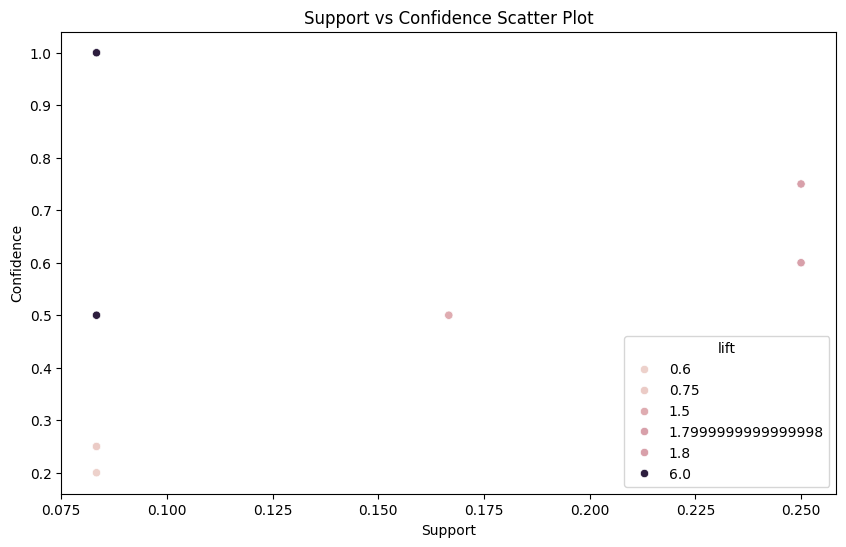

In [63]:
# Scatter plot comparing the support vs confidence
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='support',
    y='confidence',
    data=rules,
    hue='lift',
)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatter Plot')
plt.show()

<ipython-input-62-ee4c8e778efb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


<Axes: xlabel='lift', ylabel='antecedents'>

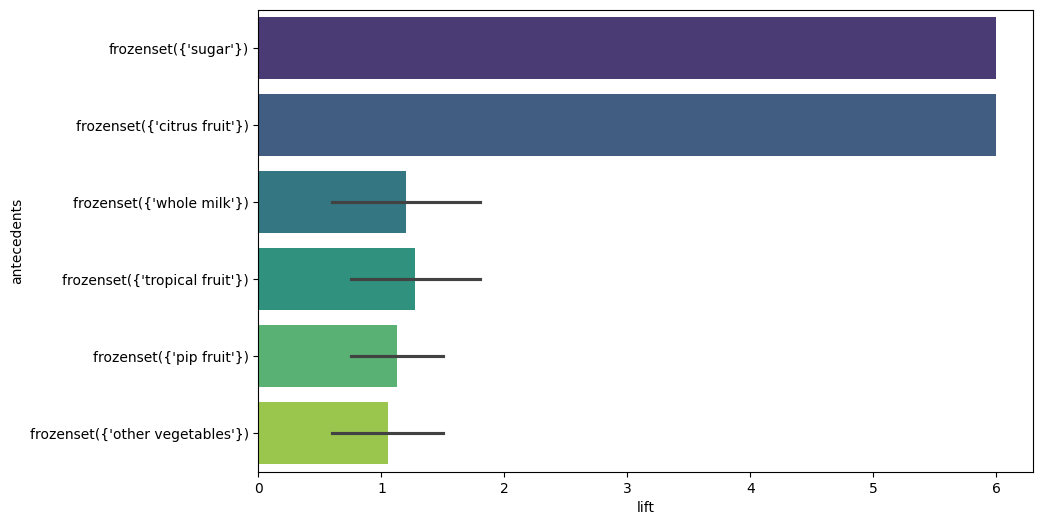

In [62]:
# Bar chart of association rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')

<ipython-input-65-802939fc85b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_items.sort_values(by='support', ascending=False).head(10), palette='viridis')


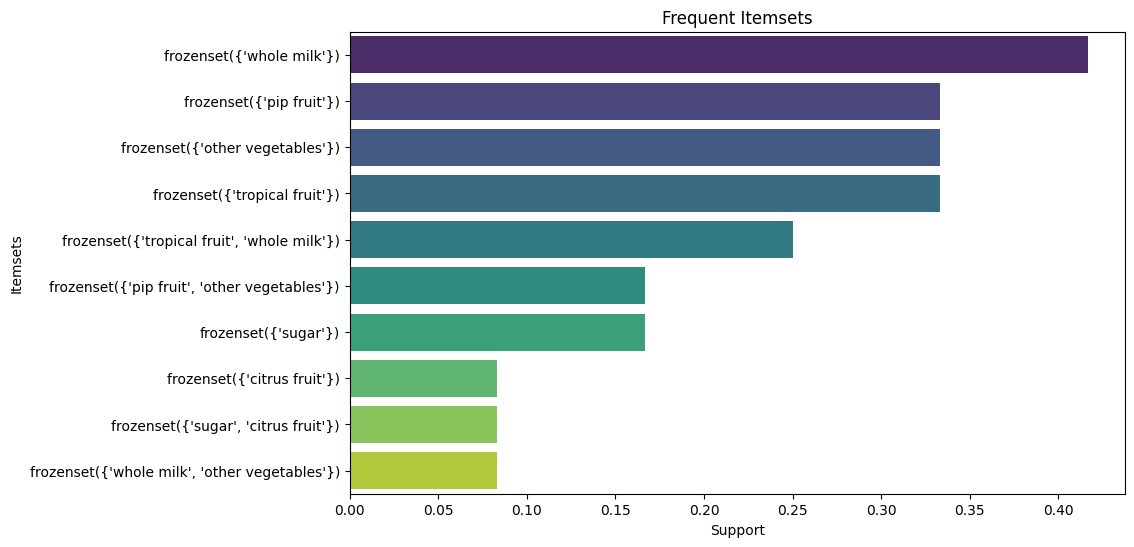

In [65]:
# Another bar chart with frequent items bought
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_items.sort_values(by='support', ascending=False).head(10), palette='viridis')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

In [86]:
# Creating a gradio web application for mba analysis
import gradio as gr

def analyze_market_basket(min_support, min_confidence):
    # Convert min_support and min_confidence to float
    min_support = float(min_support)
    min_confidence = float(min_confidence)

    # Perform Apriori analysis
    frequent_items = apriori(sample_data_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_items, metric='confidence', min_threshold=min_confidence)
    return rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


In [87]:
# Gradio interface
gr.Interface(
    fn=analyze_market_basket,
    inputs=[
        gr.Slider(0.01, 0.5, value=0.2, step=0.01, label="Minimum Support"),
        gr.Slider(0.1, 1.0, value=0.7, step=0.05, label="Minimum Confidence")
    ],
    outputs=gr.Dataframe(label="Association Rules"),
    title="Market Basket Analysis using Apriori",
    description="Adjust support and confidence to generate rules from grocery transaction data."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f95139e8e6f56235d3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


The whole purpose of this web application is to perform the Market Basket Analysis using the Apriori algorithm and association rules with helps users to analyze transaction data like the groceries purchases used above and identifies which items are frequently bought in if-then relationships between the items. So after running the mba analysis through this gradio web app, it shows me results based on the min support and min confidence is structured/chosen. So for example, I've chosen min support = 0.06 and min confidence = 0.35, it shows me the "if" part of the association rules (antecedents) as sugar and "then" part of the rule (consequents) as citrus fruit and allows me to understand the support fraction of all transactions that contain of antecedent and the consequent rules, including confidence of 0.6, and a lift of 1.8. This means that 25% of transactions include both items, and customers who buy tropical fruit are 1.8 times more likely to buy whole milk than by random chance.
